# Assignment 1
Emilia Zielinska <br>
300018129 <br>
CSI 5341 <br>
Dr. Jochen Lang <br>
September 28, 2023

## Getting Started

In [1]:
from pathlib import Path

In [2]:
# Generate lists of filenames for the needed images

directory_4 = Path("./English/Img/GoodImg/Bmp/Sample005")
directory_A = Path("./English/Img/GoodImg/Bmp/Sample011")
directory_u = Path("./English/Img/GoodImg/Bmp/Sample057")
directory_H = Path("./English/Img/GoodImg/Bmp/Sample018")

file_list_4 = [f for f in directory_4.glob('**/*') if f.is_file()]
file_list_A = [f for f in directory_A.glob('**/*') if f.is_file()]
file_list_u = [f for f in directory_u.glob('**/*') if f.is_file()]
file_list_H = [f for f in directory_H.glob('**/*') if f.is_file()]

In [3]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [4]:
# Preprocess each image by turning it grayscale and resizing to 50 by 50
# Reshape the data of each image to be in a 1D array
# Then save image into numpy matrix // 2D array

matrix_4 = []
for f in file_list_4:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_4.append(data_reshaped)

matrix_A = []
for f in file_list_A:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_A.append(data_reshaped)

matrix_u = []
for f in file_list_u:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_u.append(data_reshaped)

matrix_H = []
for f in file_list_H:
    img = imread(f, True)
    img_resized = resize(img, (50, 50))
    data = np.array(img_resized)
    data_reshaped = np.reshape(data, 50*50)
    matrix_H.append(data_reshaped)

## Binary Classifiers

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [6]:
# Create the target sets for '4' and 'A'
target_4 = ['4'] * len(matrix_4)
target_A = ['A'] * len(matrix_A)

# Concatenate the data and the target sets for '4' and 'A' into one big data / target set
x = np.concatenate((matrix_4, matrix_A), axis=0)
y = np.concatenate((target_4, target_A))

# Split the data and target sets into training, testing, and validation sets
# 70% will be training, 15% will be testing, and 15% will be validation
x_train, x_combine, y_train, y_combine = train_test_split(x, y, train_size=0.7, random_state=3)
x_test, x_val, y_test, y_val = train_test_split(x_combine, y_combine, test_size=0.5, random_state=3)

# Create and train the classifier
clf = LogisticRegression(max_iter=236)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

As can be seen above, we are splitting the dataset into the following:
- 70% training set,
- 15% testing set,
- 15% validation set.

Given that there are 605 images for '4' and 'A' combined, that gives us:
- 423 images in the training set,
- 91 images in the testing set,
- 91 images in the validation set.

The `train_test_split` function splits the set for me, however I have chosen to set the `random_state` to `3`. If the `random_state` is left at the default of `None`, it will generate a random integer each time, altering the results each time the code is run. So while the images for each set are being chosen randomly, they are consistently chosen across code executions.

In [7]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

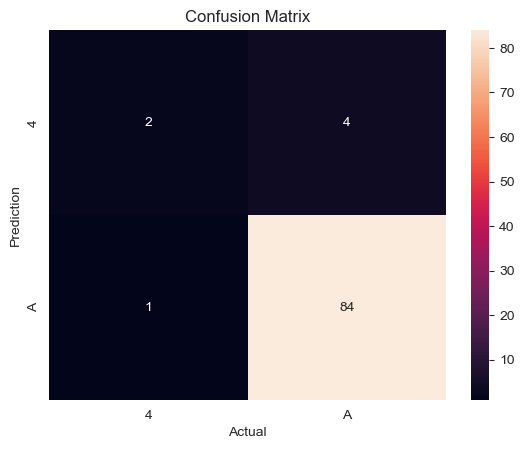

In [8]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=['4', 'A'], yticklabels=['4', 'A'])
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [9]:
tp = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[1][1]

# Precision = TP / (TP + FP)
precision_4 = tp / (tp + fp)
precision_A = tn / (tn + fn)

print('Precision for 4: ' + str(precision_4))
print('Precision for A: ' + str(precision_A))

# Recall = TP / (TP + FN)
recall_4 = tp / (tp + fn)
recall_A = tn / (tn + fp)

print('Recall for 4: ' + str(recall_4))
print('Recall for A: ' + str(recall_A))

Precision for 4: 0.3333333333333333
Precision for A: 0.9882352941176471
Recall for 4: 0.6666666666666666
Recall for A: 0.9545454545454546


In [10]:
from sklearn.metrics import RocCurveDisplay

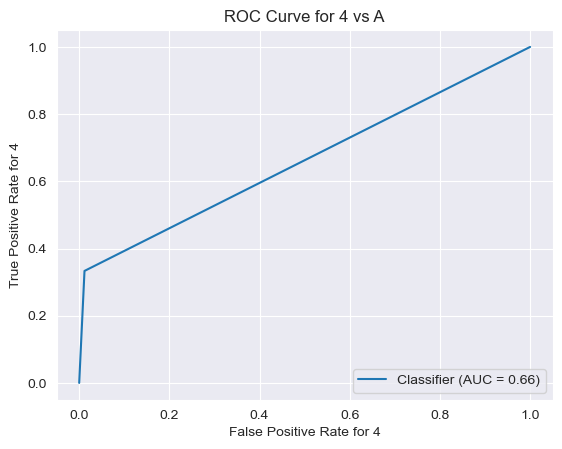

In [11]:
# Create new arrays for test and pred where 4 = 1 and A = 0
# This is necessary so that the ROC curve can be plotted properly

roc_true = []
for i in y_test:
    if i == '4':
        roc_true.append(1)
    else:
        roc_true.append(0)
        
roc_pred = []
for i in y_pred:
    if i == '4':
        roc_pred.append(1)
    else:
        roc_pred.append(0)
      
# Plot the ROC curve  
RocCurveDisplay.from_predictions(roc_true, roc_pred)
plt.title('ROC Curve for 4 vs A')
plt.xlabel('False Positive Rate for 4')
plt.ylabel('True Positive Rate for 4')
plt.show()

The precision and the recall for `A` are both very high. However, the precision and the recall for `4` are both pretty low: this is most likely due to the fact that out of the 91 images in the testing set, only 6 (less than 7%) are images of `4`. With such a low number, it means that the confusion matrix may not be as accurate as it could be if there was a testing set with a more even spread.

The ROC curve has an area under the curve (AUC) of 0.66. The closer the AUC is to 1, the better the model. If the AUC is at or below 0.5, then it's no better than a model that makes random classifications. This linear regression classifier is decent, but could still use some work.

## Multiclass Classifier
### One-VS-One

In [12]:
from sklearn.multiclass import OneVsOneClassifier

In [13]:
# Create the target sets for 'u' and 'H'
target_u = ['u'] * len(matrix_u)
target_H = ['H'] * len(matrix_H)

# Concatenate the data and the target sets for '4', 'A', 'u', and 'H' into one big data / target set
x = np.concatenate((matrix_4, matrix_A, matrix_u, matrix_H), axis=0)
y = np.concatenate((target_4, target_A, target_u, target_H))

# Split the data and target sets into training, testing, and validation sets
# 70% will be training, 15% will be testing, and 15% will be validation
x_train, x_combine, y_train, y_combine = train_test_split(x, y, train_size=0.7, random_state=3)
x_test, x_val, y_test, y_val = train_test_split(x_combine, y_combine, test_size=0.5, random_state=3)

# Create and train the classifier
clf = LogisticRegression(max_iter=332)
ovo = OneVsOneClassifier(clf)
ovo.fit(x_train, y_train)

y_pred = ovo.predict(x_test)

I use the same strategy to split the dataset in this question as in 1.2. 

We are splitting the dataset into the following:
- 70% training set,
- 15% testing set,
- 15% validation set.

Given that there are 839 images for all four characters combined, that gives us:
- 587 images in the training set,
- 126 images in the testing set,
- 126 images in the validation set.

Again, the `train_test_split` function splits the set for me, however I have chosen to set the `random_state` to `3`.

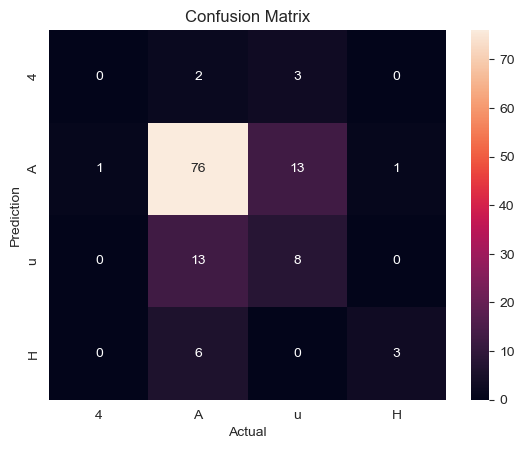

In [14]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=['4', 'A', 'u', 'H'], yticklabels=['4', 'A', 'u', 'H'])
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [15]:
tp_4 = cm[0][0]
fp_4 = cm[0][1] + cm[0][2] + cm[0][3]
fn_4 = cm[1][0] + cm[2][0] + cm[3][0]

tp_A = cm[1][1]
fp_A = cm[1][0] + cm[1][2] + cm[1][3]
fn_A = cm[0][1] + cm[2][1] + cm[3][1]

tp_u = cm[2][2]
fp_u = cm[2][0] + cm[2][1] + cm[2][3]
fn_u = cm[0][2] + cm[1][2] + cm[3][2]

tp_H = cm[3][3]
fp_H = cm[3][0] + cm[3][1] + cm[3][2]
fn_H = cm[0][3] + cm[1][3] + cm[2][3]

# Precision = TP / (TP + FP)
precision_4 = tp_4 / (tp_4 + fp_4)
precision_A = tp_A / (tp_A + fp_A)
precision_u = tp_u / (tp_u + fp_u)
precision_H = tp_H / (tp_H + fp_H)
average_precision = (precision_4 + precision_A + precision_u + precision_H) / 4

print('Precision for 4: ' + str(precision_4))
print('Precision for A: ' + str(precision_A))
print('Precision for u: ' + str(precision_u))
print('Precision for H: ' + str(precision_H))
print('Average precision: ' + str(average_precision))

# Recall = TP / (TP + FN)
recall_4 = tp_4 / (tp_4 + fn_4)
recall_A = tp_A / (tp_A + fn_A)
recall_u = tp_u / (tp_u + fn_u)
recall_H = tp_H / (tp_H + fn_H)
average_recall = (recall_4 + recall_4 + recall_u + recall_H) / 4

print('Recall for 4: ' + str(recall_4))
print('Recall for A: ' + str(recall_A))
print('Recall for u: ' + str(recall_u))
print('Recall for H: ' + str(recall_H))
print('Average recall: ' + str(average_recall))

# F1 Score = 2TP / (2TP + FP + FN)
f1_4 = (2 * tp_4) / (2 * tp_4 + fp_4 + fn_4)
f1_A = (2 * tp_A) / (2 * tp_A + fp_A + fn_A)
f1_u = (2 * tp_u) / (2 * tp_u + fp_u + fn_u)
f1_H = (2 * tp_H) / (2 * tp_H + fp_H + fn_H)
average_f1 = (f1_4 + f1_A + f1_u + f1_H) / 4

print('F1 Score for 4: ' + str(f1_4))
print('F1 Score for A: ' + str(f1_A))
print('F1 Score for u: ' + str(f1_u))
print('F1 Score for H: ' + str(f1_H))
print('Average F1 Score: ' + str(average_f1))

Precision for 4: 0.0
Precision for A: 0.8351648351648352
Precision for u: 0.38095238095238093
Precision for H: 0.3333333333333333
Average precision: 0.3873626373626374
Recall for 4: 0.0
Recall for A: 0.7835051546391752
Recall for u: 0.3333333333333333
Recall for H: 0.75
Average recall: 0.2708333333333333
F1 Score for 4: 0.0
F1 Score for A: 0.8085106382978723
F1 Score for u: 0.35555555555555557
F1 Score for H: 0.46153846153846156
Average F1 Score: 0.4064011638479723


By far the worst class for this classifier is `4`. The precision, recall, and F1 score are all at 0.0. Like in question 1.2, it performs the best on the `A` class, with sub-average results for the `u` and `H` classes. Surprisingly, the recall for `H` is quite high at 0.75, but that doesn't mean much when the precision is at 0.333. Models should strive to have both precision and recall (and therefore F1 score) high.

The average for all the metrics is very low, most likely due to the fact that `4` scored a 0.0 across all metrics and is bringing the average very down. Most of the issues lie in the dataset - out of the 126 images in the testing set, 97 of them (over 76%) of them were images of class `A`.

### One-VS-All

In [16]:
from sklearn.multiclass import OneVsRestClassifier

In [17]:
# Create the target sets for 'u' and 'H'
target_u = ['u'] * len(matrix_u)
target_H = ['H'] * len(matrix_H)

# Concatenate the data and the target sets for '4', 'A', 'u', and 'H' into one big data / target set
x = np.concatenate((matrix_4, matrix_A, matrix_u, matrix_H), axis=0)
y = np.concatenate((target_4, target_A, target_u, target_H))

# Split the data and target sets into training, testing, and validation sets
# 70% will be training, 15% will be testing, and 15% will be validation
x_train, x_combine, y_train, y_combine = train_test_split(x, y, train_size=0.7, random_state=3)
x_test, x_val, y_test, y_val = train_test_split(x_combine, y_combine, test_size=0.5, random_state=3)

# Create and train the classifier
clf = LogisticRegression(max_iter=332)
ovr = OneVsRestClassifier(clf)
ovr.fit(x_train, y_train)

y_pred = ovr.predict(x_test)

I use the same strategy to split the dataset in this question as above. 

We are splitting the dataset into the following:
- 70% training set,
- 15% testing set,
- 15% validation set.

Given that there are 839 images for all four characters combined, that gives us:
- 587 images in the training set,
- 126 images in the testing set,
- 126 images in the validation set.

Again, the `train_test_split` function splits the set for me, however I have chosen to set the `random_state` to `3`.

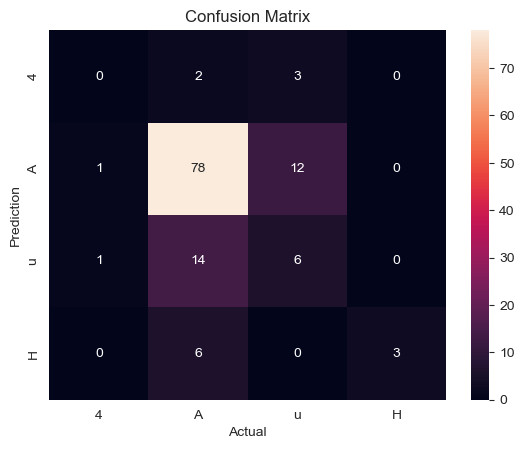

In [18]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, xticklabels=['4', 'A', 'u', 'H'], yticklabels=['4', 'A', 'u', 'H'])
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.show()

In [19]:
tp_4 = cm[0][0]
fp_4 = cm[0][1] + cm[0][2] + cm[0][3]
fn_4 = cm[1][0] + cm[2][0] + cm[3][0]

tp_A = cm[1][1]
fp_A = cm[1][0] + cm[1][2] + cm[1][3]
fn_A = cm[0][1] + cm[2][1] + cm[3][1]

tp_u = cm[2][2]
fp_u = cm[2][0] + cm[2][1] + cm[2][3]
fn_u = cm[0][2] + cm[1][2] + cm[3][2]

tp_H = cm[3][3]
fp_H = cm[3][0] + cm[3][1] + cm[3][2]
fn_H = cm[0][3] + cm[1][3] + cm[2][3]

# Precision = TP / (TP + FP)
precision_4 = tp_4 / (tp_4 + fp_4)
precision_A = tp_A / (tp_A + fp_A)
precision_u = tp_u / (tp_u + fp_u)
precision_H = tp_H / (tp_H + fp_H)
average_precision = (precision_4 + precision_A + precision_u + precision_H) / 4

print('Precision for 4: ' + str(precision_4))
print('Precision for A: ' + str(precision_A))
print('Precision for u: ' + str(precision_u))
print('Precision for H: ' + str(precision_H))
print('Average precision: ' + str(average_precision))

# Recall = TP / (TP + FN)
recall_4 = tp_4 / (tp_4 + fn_4)
recall_A = tp_A / (tp_A + fn_A)
recall_u = tp_u / (tp_u + fn_u)
recall_H = tp_H / (tp_H + fn_H)
average_recall = (recall_4 + recall_4 + recall_u + recall_H) / 4

print('Recall for 4: ' + str(recall_4))
print('Recall for A: ' + str(recall_A))
print('Recall for u: ' + str(recall_u))
print('Recall for H: ' + str(recall_H))
print('Average recall: ' + str(average_recall))

# F1 Score = 2TP / (2TP + FP + FN)
f1_4 = (2 * tp_4) / (2 * tp_4 + fp_4 + fn_4)
f1_A = (2 * tp_A) / (2 * tp_A + fp_A + fn_A)
f1_u = (2 * tp_u) / (2 * tp_u + fp_u + fn_u)
f1_H = (2 * tp_H) / (2 * tp_H + fp_H + fn_H)
average_f1 = (f1_4 + f1_A + f1_u + f1_H) / 4

print('F1 Score for 4: ' + str(f1_4))
print('F1 Score for A: ' + str(f1_A))
print('F1 Score for u: ' + str(f1_u))
print('F1 Score for H: ' + str(f1_H))
print('Average F1 Score: ' + str(average_f1))

Precision for 4: 0.0
Precision for A: 0.8571428571428571
Precision for u: 0.2857142857142857
Precision for H: 0.3333333333333333
Average precision: 0.369047619047619
Recall for 4: 0.0
Recall for A: 0.78
Recall for u: 0.2857142857142857
Recall for H: 1.0
Average recall: 0.3214285714285714
F1 Score for 4: 0.0
F1 Score for A: 0.8167539267015707
F1 Score for u: 0.2857142857142857
F1 Score for H: 0.5
Average F1 Score: 0.4006170531039641


Yet again, class `A` performs the best in all metrics and `4` receives a 0.0 in everything. The recall for `H` shot up to a 1.0, boosting its F1 score to 0.5. Many of the issues that this model is coming across is for the same reasons as the previous two in this assignment: the dataset. It seems to get really confused on what a `4` looks like, never guessing correctly, but it's able to classify most of the `A`s correctly.